## 下載模組

In [2]:
!pip install speechbrain
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 408 kB 7.1 MB/s 
     |████████████████████████████████| 1.2 MB 54.9 MB/s 
     |████████████████████████████████| 86 kB 7.1 MB/s 
     |████████████████████████████████| 596 kB 62.7 MB/s 
     |████████████████████████████████| 109 kB 66.4 MB/s 
     |████████████████████████████████| 546 kB 58.6 MB/s 
  Created wheel for hyperpyyaml: filename=HyperPyYAML-1.0.1-py3-none-any.whl size=15192 sha256=9b0402d164098fcfb6996e5e7623150d65b7d73f6306af23f9cac1d88aa13b92
  Stored in directory: /root/.cache/pip/wheels/6c/87/65/266d722c3932f81f16332ce842e972be8421e3a9cd3771766b
Successfully built hyperpyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████

## 匯入模組

In [3]:
import torchaudio
import torch
import numpy as np
import pandas as pd

from speechbrain.pretrained import EncoderClassifier
from datasets import concatenate_datasets, load_dataset
from typing import List

## 主程式

#### 下載資料

來源：[Hugging Face common_voice datasets](https://huggingface.co/datasets/common_voice) \
官方網站：[common voice](https://commonvoice.mozilla.org/zh-TW/datasets)

`load_dataset("common_voice", 語言代碼, split=資料類型)` \
語言代碼去看 [各語言資料詳細數量.xlsx](https://docs.google.com/spreadsheets/d/15dNEyjlNJiYgRrZm16PmDbW_w7u1Z0fT/edit?usp=sharing&ouid=110248902447125902030&rtpof=true&sd=true)


In [4]:
class get_data:
    def __init__(self, lang:str, num:int):
        self.lang = lang
        self.num = num

    def load(self) -> List:
        self.train = load_dataset("common_voice", self.lang, split="train")
        self.test = load_dataset("common_voice", self.lang, split="test")
        self.valid = load_dataset("common_voice", self.lang, split="validation")

        return [self.train["path"][:self.num]]#, self.test["path"][:self.num], self.valid["path"][:self.num]]

In [5]:
# load_lang = ["zh-TW", "zh-CN", "ar", "ru", "es", "de"]
load_lang = ["es"]

In [10]:
datas = [get_data(lang, 20000).load() for lang in load_lang]

Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/es/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/es/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)
Reusing dataset common_voice (/root/.cache/huggingface/datasets/common_voice/es/6.1.0/a1dc74461f6c839bfe1e8cf1262fd4cf24297e3fbd4087a711bd090779023a5e)


In [11]:
datas = np.array(datas, dtype=object)

train_dataset = datas[:,0]
# test_dataset = datas[:,1]
# valid_dataset = datas[:,2]

In [17]:
train_dataset

array([['/root/.cache/huggingface/datasets/downloads/extracted/a5cb4d3d1fbac1d159b9f453de6826b6546fe0bd7607ae4fea7479f209d732f0/cv-corpus-6.1-2020-12-11/es/clips/common_voice_es_18306544.mp3',
        '/root/.cache/huggingface/datasets/downloads/extracted/a5cb4d3d1fbac1d159b9f453de6826b6546fe0bd7607ae4fea7479f209d732f0/cv-corpus-6.1-2020-12-11/es/clips/common_voice_es_18306545.mp3',
        '/root/.cache/huggingface/datasets/downloads/extracted/a5cb4d3d1fbac1d159b9f453de6826b6546fe0bd7607ae4fea7479f209d732f0/cv-corpus-6.1-2020-12-11/es/clips/common_voice_es_18306546.mp3',
        ...,
        '/root/.cache/huggingface/datasets/downloads/extracted/a5cb4d3d1fbac1d159b9f453de6826b6546fe0bd7607ae4fea7479f209d732f0/cv-corpus-6.1-2020-12-11/es/clips/common_voice_es_19331722.mp3',
        '/root/.cache/huggingface/datasets/downloads/extracted/a5cb4d3d1fbac1d159b9f453de6826b6546fe0bd7607ae4fea7479f209d732f0/cv-corpus-6.1-2020-12-11/es/clips/common_voice_es_19331723.mp3',
        '/root/.cache/

來源：https://huggingface.co/TalTechNLP/voxlingua107-epaca-tdnn

In [13]:
language_id = EncoderClassifier.from_hparams(source="TalTechNLP/voxlingua107-epaca-tdnn", savedir="tmp")

/usr/local/lib/python3.7/dist-packages/huggingface_hub/utils/_deprecation.py:43: FutureWarning: Pass library_name=False as keyword args. From version 0.8 passing these as positional arguments will result in an error
  FutureWarning,


Downloading:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/84.5M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

該模型可以用來將語音檔案轉換成數字 \

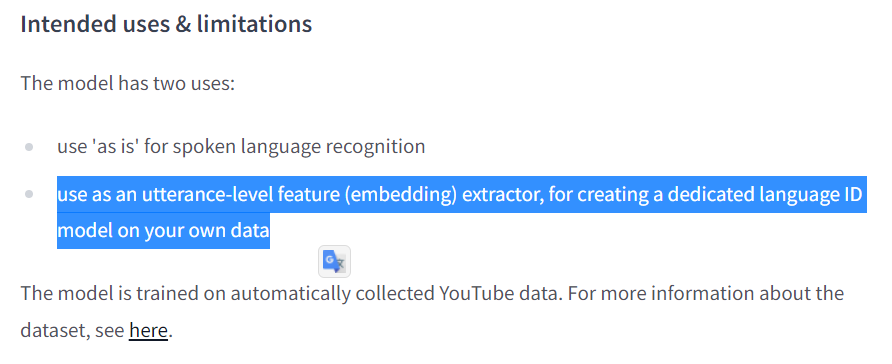

#### 獲取數值

In [14]:
def get_emb(path:str) -> torch.Tensor:
    signal = language_id.load_audio(path)
    emb =  language_id.encode_batch(signal)
    return emb

In [18]:
train_emb = [get_emb(path) for dataset in train_dataset for path in dataset]

torch.save(train_emb, "tmp/es_train_emb.pt")

In [ ]:
test_emb = [get_emb(path) for dataset in test_dataset for path in dataset]

torch.save(test_emb, "tmp/4000_test_emb.pt")

In [ ]:
valid_emb = [get_emb(path) for dataset in valid_dataset for path in dataset]

torch.save(valid_emb, "tmp/4000_valid_emb.pt")